In [1]:
import torch
from torchsummary import summary


In [2]:
from model.ganomaly.custom_torch_model import (
    CustomGanomalyModel,
    Encoder,
    Decoder,
    Discriminator,
    Generator,
)
CHANNELS_START = 64
LATENT_VEC_SIZE = 256
input_size = 64, 64
# model = CustomGanomalyModel(
#     input_size=input_size,
#     num_input_channels=1,
#     latent_vec_size=100,
# ).to("cuda")

encoder = Encoder(
    input_size=input_size,
    latent_vec_size=LATENT_VEC_SIZE,
    channels_start=CHANNELS_START,
).to("cuda")
summary(encoder, (1, *input_size))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]             640
       BatchNorm2d-2           [-1, 64, 64, 64]             128
         LeakyReLU-3           [-1, 64, 64, 64]               0
            Conv2d-4           [-1, 64, 64, 64]          36,928
       BatchNorm2d-5           [-1, 64, 64, 64]             128
         LeakyReLU-6           [-1, 64, 64, 64]               0
            Conv2d-7           [-1, 64, 32, 32]          36,928
       BatchNorm2d-8           [-1, 64, 32, 32]             128
         LeakyReLU-9           [-1, 64, 32, 32]               0
           Conv2d-10          [-1, 128, 32, 32]          73,856
      BatchNorm2d-11          [-1, 128, 32, 32]             256
        LeakyReLU-12          [-1, 128, 32, 32]               0
           Conv2d-13          [-1, 128, 32, 32]         147,584
      BatchNorm2d-14          [-1, 128,

In [3]:
decoder = Decoder(
    latent_vec_size=LATENT_VEC_SIZE,
    conv_input_shape=encoder.conv_output_shape,
    channels_start=CHANNELS_START,
).to("cuda")
summary(decoder, (LATENT_VEC_SIZE,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Dropout-1                  [-1, 256]               0
            Linear-2                 [-1, 1280]         328,960
       BatchNorm1d-3                 [-1, 1280]           2,560
              ReLU-4                 [-1, 1280]               0
         Unflatten-5            [-1, 320, 2, 2]               0
   ConvTranspose2d-6            [-1, 256, 4, 4]         737,536
       BatchNorm2d-7            [-1, 256, 4, 4]             512
         LeakyReLU-8            [-1, 256, 4, 4]               0
            Conv2d-9            [-1, 256, 4, 4]         590,080
      BatchNorm2d-10            [-1, 256, 4, 4]             512
        LeakyReLU-11            [-1, 256, 4, 4]               0
           Conv2d-12            [-1, 256, 4, 4]         590,080
      BatchNorm2d-13            [-1, 256, 4, 4]             512
        LeakyReLU-14            [-1, 25

In [4]:
generator = Generator(
    input_size=input_size,
    latent_vec_size=LATENT_VEC_SIZE,
    channels_start=CHANNELS_START,
).to("cuda")
summary(generator, (1,*input_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]             640
       BatchNorm2d-2           [-1, 64, 64, 64]             128
         LeakyReLU-3           [-1, 64, 64, 64]               0
            Conv2d-4           [-1, 64, 64, 64]          36,928
       BatchNorm2d-5           [-1, 64, 64, 64]             128
         LeakyReLU-6           [-1, 64, 64, 64]               0
            Conv2d-7           [-1, 64, 32, 32]          36,928
       BatchNorm2d-8           [-1, 64, 32, 32]             128
         LeakyReLU-9           [-1, 64, 32, 32]               0
           Conv2d-10          [-1, 128, 32, 32]          73,856
      BatchNorm2d-11          [-1, 128, 32, 32]             256
        LeakyReLU-12          [-1, 128, 32, 32]               0
           Conv2d-13          [-1, 128, 32, 32]         147,584
      BatchNorm2d-14          [-1, 128,

In [5]:
discriminator = Discriminator(
    input_size=(64, 64),
    channels_start=CHANNELS_START,
).to("cuda")
summary(discriminator, (1, *input_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]             640
       BatchNorm2d-2           [-1, 64, 64, 64]             128
         LeakyReLU-3           [-1, 64, 64, 64]               0
            Conv2d-4           [-1, 64, 64, 64]          36,928
       BatchNorm2d-5           [-1, 64, 64, 64]             128
         LeakyReLU-6           [-1, 64, 64, 64]               0
            Conv2d-7           [-1, 64, 32, 32]          36,928
       BatchNorm2d-8           [-1, 64, 32, 32]             128
         LeakyReLU-9           [-1, 64, 32, 32]               0
           Conv2d-10          [-1, 128, 32, 32]          73,856
      BatchNorm2d-11          [-1, 128, 32, 32]             256
        LeakyReLU-12          [-1, 128, 32, 32]               0
           Conv2d-13          [-1, 128, 32, 32]         147,584
      BatchNorm2d-14          [-1, 128,

(1, 64, 64)
(1, 64, 64)
(1, 64, 64)
(1, 64, 64)
(1, 64, 64)
(1, 64, 64)
(1, 64, 64)
(1, 64, 64)
(1, 64, 64)
(1, 64, 64)


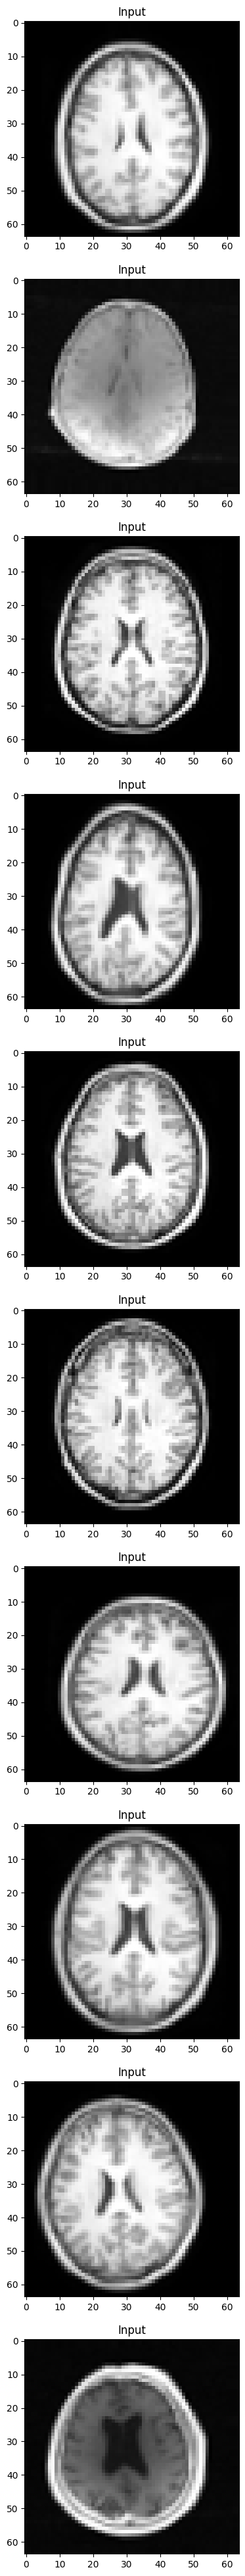

In [6]:
from data_loader import TrainDataModule, get_all_test_dataloaders, get_normal_test_dataloader, get_train_dataloader
from matplotlib import pyplot as plt

train_loader = get_train_dataloader(split_dir='./data/splits',target_size=(64,64),batch_size=32)

for batch in train_loader:
    fig, ax = plt.subplots(10, figsize=(20, 50))
    for i in range(10):
        input_img = batch[i].numpy() 
        print(input_img.shape)
        ax[i].imshow(input_img.transpose(1, 2, 0), cmap="gray")
        ax[i].set_title("Input")
    break
plt.show()